In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import math

# Define a custom colorblind friendly colormap
custom_cmap = [
    '#e69f00',   
    '#0072b2',
    '#56b4e9',
    '#cc79a7', 
    '#f0e442', 
    '#009e73', 
    '#000000'
]
plt.rcParams["axes.prop_cycle"] = cycler(color=custom_cmap)
plt.rcParams['axes.axisbelow'] = True

# Seed random generator for reproducibility
rng = np.random.default_rng(42)

# Set n samples we want
n_samples = 256

# Generate data
weights_m = rng.normal(80, 10, n_samples//2)
weights_f = rng.normal(65, 10, n_samples//2)

heights_m = weights_m + rng.normal(100, 20, n_samples//2)
heights_f = weights_f + rng.normal(90, 10, n_samples//2)

#is_male = np.ones(n_samples, dtype=np.int8)
#is_male[n_samples//2:]-=1

# Create dataframe from data
df_w2h = pd.DataFrame({"height": np.concatenate([heights_m, heights_f]), 
                       "weight": np.concatenate([weights_m, weights_f])})
df_w2h = df_w2h[~df_w2h['weight'].between(75, 80, inclusive='left')]
new_row = pd.DataFrame({'height': [130, 220], 'weight': [75.1, 79.9]})
df_w2h = pd.concat([df_w2h, new_row], ignore_index=True)
print(df_w2h.head())

       height     weight
0  191.742492  83.047171
1  162.077038  69.600159
2  184.828053  87.504512
3  161.907731  89.405647
4  155.726173  60.489648


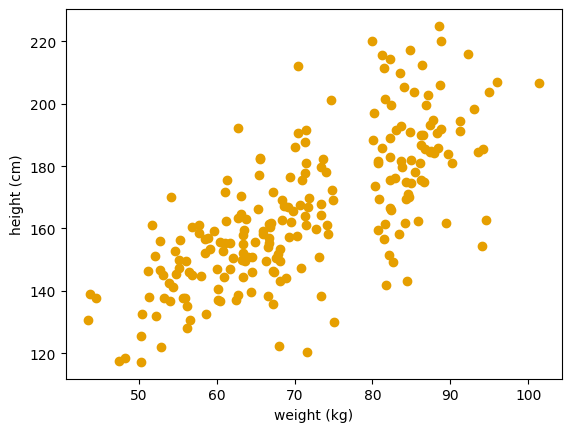

In [2]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height)
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/weight_height_dataset.png")
plt.show()

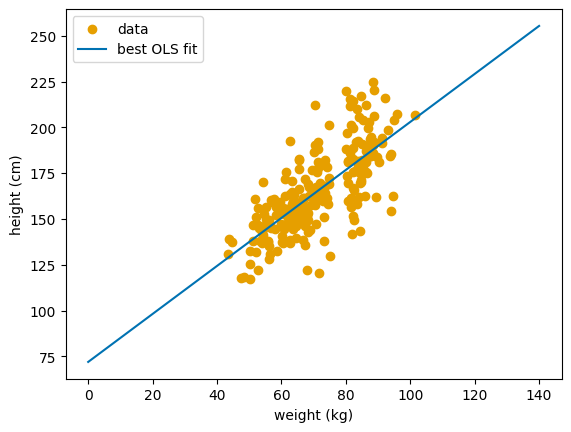

In [3]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height, label='data')
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.plot([0, 140], [71.94+1.31*0, 71.94+1.31*140], color=custom_cmap[1], label='best OLS fit')
plt.legend()
plt.savefig("figs/best_line_carousel.png")
plt.show()

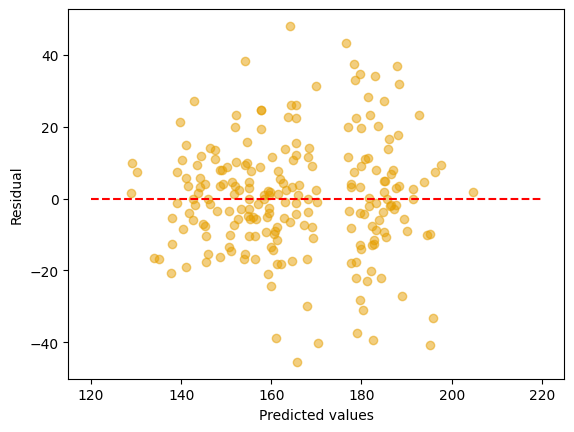

In [4]:
residuals = []
predictions = []
for i, observation in enumerate(df_w2h.iterrows()):
    model_prediction = 71.94 + 1.31*observation[1].weight 
    residuals.append(observation[1].height - model_prediction)
    predictions.append(model_prediction)

plt.figure()
plt.hlines(0, xmin=120, xmax=220, color='red', linestyle='--')
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.savefig('figs/residual_plot.png')
plt.show()
           

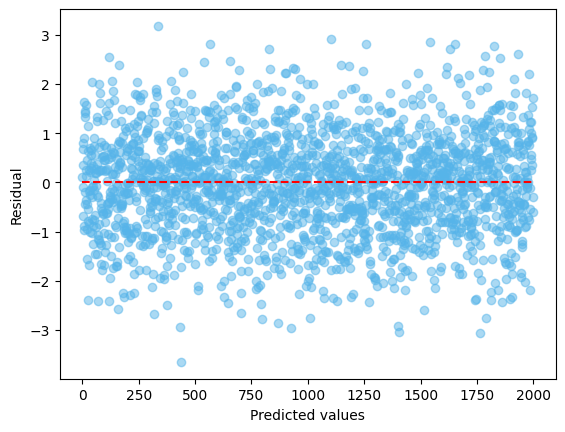

In [5]:
plt.figure()
prf = rng.normal(0,1, 2000)
plt.hlines(0, xmin=0, xmax=2000, color='red', linestyle='--')
plt.scatter(np.arange(0,2000),prf, alpha=0.5, color=custom_cmap[2])
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.savefig('figs/perfect_residual_plot.png')
plt.show()

In [12]:
from sklearn.metrics import r2_score
observations = [obs[1].height for obs in df_w2h.iterrows()]

print(f"{r2_score(observations, predictions):.3f}")

0.525
